In [94]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [95]:
# ดึงข้อมูลหุ้น AOT
stock_symbol = "GULF.BK"  # สำหรับตลาดหลักทรัพย์ไทย (SET)
df = yf.download(stock_symbol, start="2023-01-01", end="2023-12-31")
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GULF.BK,GULF.BK,GULF.BK,GULF.BK,GULF.BK
Date,,,,,
2023-01-03,52.368126,53.082237,52.368126,52.606163,9400300
2023-01-04,52.606163,53.082237,52.130089,52.368126,11692300
2023-01-05,52.844200,53.320274,52.606163,52.844200,13887600
2023-01-06,52.844200,53.082237,52.606163,52.844200,11046600
2023-01-09,52.844200,53.082237,52.130089,53.082237,23063500


In [96]:
excel_filename = "AOT_Stock_2023.xlsx"
df.to_excel(excel_filename)

In [97]:
df1=pd.read_excel("/content/AOT_Stock_2023.xlsx")
df1.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,GULF.BK,GULF.BK,GULF.BK,GULF.BK,GULF.BK
1,Date,NaN,NaN,NaN,NaN,NaN
2,2023-01-03 00:00:00,52.368126,53.082237,52.368126,52.606163,9400300
3,2023-01-04 00:00:00,52.606163,53.082237,52.130089,52.368126,11692300
4,2023-01-05 00:00:00,52.8442,53.320274,52.606163,52.8442,13887600


In [98]:
df1 = df1.drop(df1.index[[0, 1]])
df1.head()

,Price,Close,High,Low,Open,Volume
2,2023-01-03 00:00:00,52.368126,53.082237,52.368126,52.606163,9400300
3,2023-01-04 00:00:00,52.606163,53.082237,52.130089,52.368126,11692300
4,2023-01-05 00:00:00,52.8442,53.320274,52.606163,52.8442,13887600
5,2023-01-06 00:00:00,52.8442,53.082237,52.606163,52.8442,11046600
6,2023-01-09 00:00:00,52.8442,53.082237,52.130089,53.082237,23063500


In [99]:
# เช็คข้อมูลที่หายไป
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Price   Ticker 
Close   GULF.BK    0
High    GULF.BK    0
Low     GULF.BK    0
Open    GULF.BK    0
Volume  GULF.BK    0
dtype: int64


In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 2 to 244
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   243 non-null    object
 1   Close   243 non-null    object
 2   High    243 non-null    object
 3   Low     243 non-null    object
 4   Open    243 non-null    object
 5   Volume  243 non-null    object
dtypes: object(6)
memory usage: 11.5+ KB


In [101]:
df1.describe()

<ipython-input-101-784441b173b6>:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df1.describe()


,Price,Close,High,Low,Open,Volume
count,243,243.000000,243.000000,243.000000,243.000000,243
unique,243,56.000000,157.000000,158.000000,175.000000,242
top,2023-01-03 00:00:00,51.415977,51.892051,51.177941,51.654014,11502100
freq,1,13.000000,8.000000,7.000000,6.000000,2


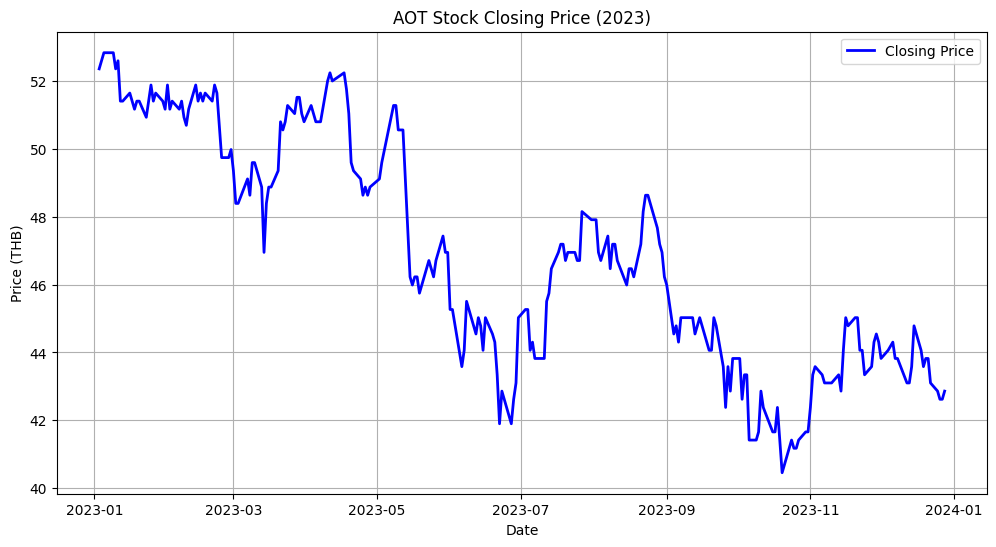

In [102]:
# สร้างกราฟราคาปิดของหุ้น AOT
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2, color='blue')

plt.title("AOT Stock Closing Price (2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()

# แสดงกราฟ
plt.show()


In [104]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


data = df[["Close"]].values

# สเกลข้อมูลให้อยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ฟังก์ชันสร้างชุดข้อมูลแบบ Time Series
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# ตั้งค่าช่วงเวลา 60 วันย้อนหลังเพื่อพยากรณ์วันถัดไป
time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# แบ่ง Train-Test (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# แปลงให้เป็นรูปแบบที่เหมาะสมกับ LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# คอมไพล์โมเดล
model.compile(optimizer="adam", loss="mean_squared_error")

# เทรนโมเดล
model.fit(X_train, Y_train, batch_size=16, epochs=50, verbose=1)

# ทำการพยากรณ์ปี 2024
future_days = 365  # จำนวนวันที่ต้องการทำนาย
future_predictions = []

# ใช้ข้อมูล 60 วันสุดท้ายเป็นจุดเริ่มต้น
last_60_days = scaled_data[-time_step:].reshape(1, time_step, 1)

for _ in range(future_days):
    pred = model.predict(last_60_days, verbose=0)
    pred = pred.reshape(1, 1, 1)  # แปลงให้มีขนาด 3 มิติ
    future_predictions.append(pred[0, 0])
    last_60_days = np.append(last_60_days[:, 1:, :], pred, axis=1)

# แปลงค่ากลับเป็นราคาหุ้นจริง
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# แปลง last_date ให้เป็น datetime
last_date = pd.to_datetime(df.index[-1])

# สร้างช่วงวันที่สำหรับปี 2024
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='D')


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.1315
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0263
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0219
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0175
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0144
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0154
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0141
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0132
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0138
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0114
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0117
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0109
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0119
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0089
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0101
Epoch 16/50
10

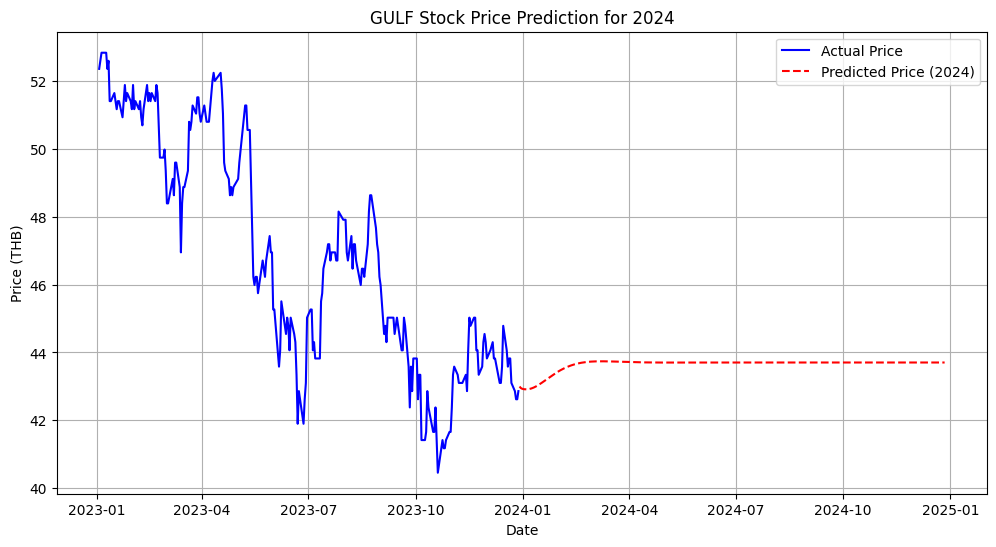

In [106]:
# ตรวจสอบและแปลง df.index และ future_dates เป็น datetime
df.index = pd.to_datetime(df.index, errors="coerce")
future_dates = pd.to_datetime(future_dates, errors="coerce")

# วาดกราฟทำนายราคาหุ้นปี 2024
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual Price", color="blue")
plt.plot(future_dates, future_predictions, label="Predicted Price (2024)", color="red", linestyle="dashed")
plt.title("GULF Stock Price Prediction for 2024")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()
plt.show()
